In [ ]:
#!git clone https://github.com/neuralcomputer/ML_School.git

# Тема 27. Нейрокриптография. Древовидные машины четности

<p align="right"> <i> Поиграем в шпионов? </i> </p>

## Введение

Испокон веков люди стремятся обезопасить свои записи, переговоры, чтобы посторонние не могли узнать их содержания. Для этих целей применяются различные виды *шифрования*, когда, например, текст, который вы хотите передать заменяется на не понятную никому, кроме вас и вашего абонента, абракадабру (это может быть другой текст, цифры или даже рисунки, вспомните Шерлока Холмса и его "Пляшущих человечков").

Но вы сами и ваш абонент, который знает *ключ* шифрования, без труда восстановите исходный текст. Ключ - это некоторое правило шифрования и дешифровки (т.е. расшифровывания). Он может быть представлен в разном виде, для компьютеров обычно это длинная последовательность *битов*, символов 0 и 1. Сегодня используются ключи длиной порядка тысяч бит (1024, 2048).

Для современных шифров если ключ известен - вы можете легко расшифровать зашифрованное сообщение, а если нет, то сделать это очень-очень трудно. 

Но вот беда, если два абонента, Алиса и Боб, хотят обменяться секретными посланиями, то нужно чтобы у них обоих был нужный ключ. Если послать ключ по не секретной почте, то любой сможет его узнать и все шифрование бесполезно. Необходимо как-то обменяться ключами, или как говорят, сгенерировать ключ, который был бы известен только Алисе и Бобу и никому другому. 

Таких схем (их называют протоколами) генерации ключей придумано несколько, одна из самых распространенных это [протокол Диффи-Хеллмана](https://ru.wikipedia.org/wiki/Протокол_Диффи_—_Хеллмана). Почитайте про него самостоятельно, мы не будем на нем останавливаться. 

_____________________________________________
<details>
    <summary> <b>Протокол Диффи-Хеллмана: (нажмите, необязательно)</b> </summary>
    
Два абонента, Алиса и Боб, хотят обменяться секретными ключами, чтобы затем с их помощью обмениваться зашифрованными сообщениями.
Для этого они выбирают два числа __g__ и __p__, которые не являются секретными и могут быть известны посторонним. 

Затем Алиса генерирует некоторое большое случайное число __a__, а Боб большое случайное число __b__, которые никому не сообщают. 

Алиса вычисляет [остаток от деления](https://ru.wikipedia.org/wiki/Деление_с_остатком). $A=g^a \bmod p$ 

Боб вычисляет остаток от деления. $B=g^b \bmod p$

Стороны обмениваются числами __A__ и __B__, они не секретны и любой посторонний их может узнать.

Но это не страшно, если злоумышленник может только читать данные из канала связи, но не может их подменять на свои. 

Приняв число __B__ от Боба, Алиса вычисляет $ B^a \bmod p = {(g^b \bmod p)}^a \bmod p = g^{ab} \bmod p $  

А Боб вычисляет вычисляет $ A^b \bmod p = {(g^a \bmod p)}^b \bmod p = g^{ab} \bmod p $  

Как видим, получилось одно и то же число, которое и является секретным ключом. Злоумышленнику же, не зная чисел __a__ и __b__, будет вычислительно сложно восстановить их из чисел __A__ и __B__ при достаточной длине (в битах) ключа и разумном выборе чисел __g__ и __p__.
</details>
_________________

Надежность этого протокола сильно зависит от свойств чисел, которые в нем используются, и ученые боятся, что появление [квантовых компьютеров]( https://ru.wikipedia.org/wiki/Квантовый_компьютер), в которых взлом шифра будет гораздо проще, приведет к отказу от такого протокола. Поэтому заранее придумывают алгоритмы обмена ключами, которые бы не были привязаны к свойствам чисел, а основывались бы на других явлениях.

Одним из таких подходов является использования *взаимодействующих нейронных сетей*, а именно __древовидных машин четности__, и процесса их синхронизации. 

## Древовидные машины четности
[Древовидные машины четности](https://ru.wikipedia.org/wiki/Нейрокриптография) (ДМЧ, по английски tree parity machines, TPM) это специальный класс нейронных сетей, но в целом похожих на двуслойный персептрон.

ДМЧ состоит из двух слоев нейронов, на первом, скрытом, слое находится __K__ нейронов, второй слой состоит из одного нейрона.

Каждый i-ый нейрон первого слоя принимает __N__ своих собственных входов __x__, таким образом общее число входов в ДМЧ равно __K * N__.

Входы $X_{ij}$ могут принимать только два значения {-1;+1}.

Нейроны первого слоя имеют весовые коэффициенты $W_{ij}$ которые принимают _целочисленные_ значения из диапазона {-L до +L}.

Нейрон i вычисляет взвешенную сумму своих входов и возвращает знак ее $ S_i=sgn(\sum_{j=1}^{N} W_{ij} * X_{ij}) $

sgn() - знак числа, -1 или +1, случай 0 отнесен к одному из них (например к +1).

Это очень похоже на работу персептронного нейрона, но и отличается:
* у этих нейронов нет смещений.
* веса - только целые числа.
* функция активации - взятие знака - принимает только два значения. Обратите внимание, что она не дифференцируема, а значит градиентный спуск тут не применим, впрочем он и не нужен.
* у каждого нейрона свои собственные входы, тогда как в персептроне, входы у нейронов общие.

![img](https://drive.google.com/uc?id=1tTPnv7pqa-mMsj0QMPsj1CFlisp73rpQ)

Таким образом, выходы нейронов принимают только два значения {-1;+1}.

Единственный нейрон на выходе ДМЧ принимает выходы нейронов первого слоя и перемножает их, а поскольку такие выходы принимают значение {-1;+1}, то и выход ДМЧ __T__ принимает только два значения {-1;+1}. $ T=\prod_{i=1}^{K} S_i $

При этом, если число выходов нейронов первого слоя со значением -1 четно, то выход ДМЧ +1, а если нечетно, то -1. Поэтому и назвали такие нейронные сети машинами _четности_. А поскольку их структура похожа на дерево, то полное название - древовидные машины четности. 





## Обмен секретными ключами
Имея такие ДМЧ стороны (Алиса и Боб) могут сгенерировать секретные ключи.

Сначала Алиса и Боб выбирают не секретные одинаковые параметры своих ДМЧ:
* K - число нейронов
* N - число входов каждого нейрона
* L - диапазон изменения весовых коэффициентов

и создают себе по экземпляру ДМЧ. 
 
Далее стороны будут обмениваться информацией в цикле синхронизации.

- 0) Стороны случайно из заданного диапазона генерируют (целые) весовые коэффициенты нейронов, каждая сторона самостоятельно, никому их не сообщают. 
- 1) Генерируется случайно вектор входов X, он не секретен и известен обеим сторонам и состоит только из +/- 1. Длина его, очевидно, K * N
- 2) Каждая сторона рассчитывает выход своей ДМЧ для такого входа (помним, что это или +1 или -1) и сообщает его другой стороне.
- 3) __Если выходы ДМЧ сторон совпадают__ обе стороны изменяют весовые коэффициенты своих ДМЧ по определенному правилу, если не совпадают, ничего не делают.
- 4) Переход на п.1) 

Так в цикле проводится множество обменов, стороны или изменяют свои веса или нет, но что удивительно, и до сих пор не доказано, но показано на практике, что в конечном счете **веса ДМЧ обоих абонентов становятся одинаковыми (!)**, синхронизируются. Они, веса, и будут использоваться в качестве секретного ключа.

### Изменение весов


Веса ДМЧ изменяются __только в случае, если выходы обеих ДМЧ одинаковы__ $T_A=T_B$.

Веса изменяются __только для тех нейронов, выходы которых совпадают с выходом ДМЧ__ $S_i=T$. 

Во всех противных случаях веса не изменяются.

При изменении весов они не должны выходить из диапазона -L до +L, должны обрезаться.

Веса ДМЧ могут меняться по нескольким правилам (но одинаковым для сторон):
* правило Хебба: $ W_{ij}\leftarrow W_{ij} + X_{ij}*T $
* правило анти-Хебба: $ W_{ij}\leftarrow W_{ij} - X_{ij}*T $
* правило случайного блуждания: $ W_{ij} \leftarrow W_{ij}+X_{ij}$

Итак, чтобы сгенерировать секретный ключ, абонентам нужно создать ДМЧ, провести несколько итераций синхронизации, использовать веса как секретный ключ. Тут важно, что заранее мы не знаем точно сколько времени замет полная синхронизация весов, это зависит от параметров ДМЧ. Но даже если мы будем продолжать синхронизацию после того, как веса совпадут, они продолжат оставаться одинаковыми у абонентов, хоть сами веса будут меняться, но меняться одинаково.   

# Реализация ДМЧ
Давайте реализуем ДМЧ.


In [1]:
import numpy as np # для работы с массивами 
from matplotlib import pyplot as plt # для рисования

# класс ДМЧ
class TPM:
    def __init__(self, K=10, N=100, L=2): # инициализация
        self.K = K # число нейронов
        self.N = N # число входов каждого нейрона
        self.L = L # дипазон изменения весов
        # случайные целые весовые коэффициенты, удобно представить в виде матрицы
        self.W = np.random.randint(-L, L + 1, [K, N])
        # случайные входы, удобно представить в виде матрицы такого же размера
        self.X = [] #
        self.S = np.zeros([K]) # выходы нейронов первого слоя
        self.T = 0 # выход ДМЧ
        
    def predict(self,X): # расчет выхода ДМЧ
        # X - вход в ДМЧ
        K = self.K # число нейронов
        N = self.N # число входов каждого нейрона
        if X.shape[0]!=K: # на всякий случай проверим форму массива
            X=X.reshape([K,N]) # и преобразуем к матрице K*N
        
        S = np.sign(np.sum(X * self.W, axis=1)) # вычислим выходы нейронов
        S[S==0]=1 # на случай если сумма равна 0 надо результат заменить на +1
        
        T=np.prod(S) # произведение выходов всех нейронов первого слоя
        
        self.X=X # запишем обратно
        self.S=S #
        self.T=T #
        
        return T # возвратим выход
    
    def update(self,Tb): # обновление весов
        # Tb - выход ДМЧ второго абонента
        W=self.W # веса
        if Tb==self.T: # в случае если выходы обеих машин совпадают
            ind=self.S==Tb # только те нейроны, выходы которых совпадают с выходом машины
            W[ind,:] = W[ind,:] + X[ind,:]*Tb # изменяем по правилу Хебба
            W[W>L]=L # обрезаем, если вышли за диапазон
            W[W<-L]=-L #
            
            self.W=W # сохраняем
            

# Задание 1 
Создайте функцию rand_x(K,N) которая генерирует подходящий вход в ДМЧ в виде матрицы размером  K на N из дискретного равномерного распределения. 

Сгенерируйте такой вход для K=100, N=200 и посчитайте количество +1 и -1 в созданном массиве. Похоже ли распределение на дискретное равномерное? 

In [2]:
def rand_x(K,N): # генерация входа
    return 2*np.random.randint(0, 1 + 1, [K, N])-1 #
        

In [3]:
#1
tmp=rand_x(100,200)
print(np.sum(tmp==1))
print(np.sum(tmp==-1))
print(np.sum(tmp==0)) # очевидно таких нет

10112
9888
0


# Задание 2
Создайте функцию sync_score(m1, m2) которая принимает две ДМЧ m1 и m2 и считает похожесть их весовых коэффициентов так:
* считает абсолютное значение разности матриц весов двух ДМЧ
* делит это на 2L
* находит среднее значение по всем элементам матрицы результата предыдущего пункта
* вычитает предыдущий результат из единицы

Посчитайте 
* похожесть для ДМЧ с K=3, N=5, L=2. У первой ДМЧ все веса равны +2, у второй ДМЧ все веса равны -2
* похожесть для ДМЧ с K=3, N=5, L=10. У первой ДМЧ все веса равны +5, у второй ДМЧ все веса равны -5 

Объясните результат. Почему во втором случае похожесть выше, хоть веса отличаются на большее значение?


In [4]:
def sync_score(m1, m2): # доля совпадений весов
    return 1.0 - np.average( # среднее, оно считается по всем элементам
        1.0 * np.abs(m1.W - m2.W) # абсолютное значение разности
        /(2 * m1.L)) # делитель - размер диапазона

In [5]:
# 2A
m1=TPM(3,5,2)
m2=TPM(3,5,2)
m1.W=2*np.ones([3,5])
m2.W=-2*np.ones([3,5])
sync_score(m1, m2)

0.0

In [6]:
# 2B
m1=TPM(3,5,10)
m2=TPM(3,5,10)
m1.W=5*np.ones([3,5])
m2.W=-5*np.ones([3,5])
sync_score(m1, m2)

0.5

# Задание 3
Проведите синхронизацию двух ДМЧ Алисы и Боба с K=10, N=20, L=2

Для этого в цикле
* генерируйте случайные входы в ДМЧ
* считайте выходы обеих ДМЧ
* обновляйте веса обеих ДМЧ по соотв. правилу
* считайте похожесть весов этих ДМЧ.

Выведите график изменения похожести весов от времени (итераций).

Найдите время синхронизации - число итераций которое потребовалось чтобы веса ДМЧ совпали. Выведите это время в заголовке графика.
(ограничьтесь 2000 итераций чтобы долго не ждать).

Если синхронизация достигнута, а ДМЧ продолжают работать, то может ли синхронизация нарушиться в последствии? Объясните, почему. 

Убедитесь, что веса Алисы и Боба одинаковы, выведя их на экран.

[[ 2  0 -2 -2  2  2  2 -1  1  1  1  2  0  0  2  1  1  2 -2  0]
 [ 1  2 -2  1  2 -2  1  2  2 -2  1  2 -2  0  0 -2  1 -2 -1 -2]
 [-1  2  0 -2 -1  0  2 -1  2  2 -1  2  2 -2 -2 -2  2 -2  1  2]
 [ 0  0 -2  2  2 -2 -1 -2  2  2  0 -1 -2  2  1  1  1 -1 -2  1]
 [ 2  2  0 -1 -2  0  1 -1  2 -2 -2  1  2  1  2 -1  2  2  1  2]
 [ 2 -1 -2  1 -2 -2 -2  0  0 -1 -1 -1  1 -1 -2 -2  2  2  2  0]
 [-1 -2  0  1 -2 -1  1 -1 -2  1 -2  0 -2 -1 -1 -2  2  2  1  1]
 [ 1  2  1  2  0 -2  0 -1 -2 -2  1 -2 -2  1  2 -2 -1  1  2  0]
 [-2 -1  2  1  1 -1 -2  2  1 -2  1  2 -2  2 -1 -2  0 -1  0  1]
 [-2 -2 -2 -2 -1  1  2  2  0 -1  2  1  1 -1  1  2  2  0  2  0]]
[[ 2  0 -2 -2  2  2  2 -1  1  1  1  2  0  0  2  1  1  2 -2  0]
 [ 1  2 -2  1  2 -2  1  2  2 -2  1  2 -2  0  0 -2  1 -2 -1 -2]
 [-1  2  0 -2 -1  0  2 -1  2  2 -1  2  2 -2 -2 -2  2 -2  1  2]
 [ 0  0 -2  2  2 -2 -1 -2  2  2  0 -1 -2  2  1  1  1 -1 -2  1]
 [ 2  2  0 -1 -2  0  1 -1  2 -2 -2  1  2  1  2 -1  2  2  1  2]
 [ 2 -1 -2  1 -2 -2 -2  0  0 -1 -1 -1  1 -1 -2 -2  2  

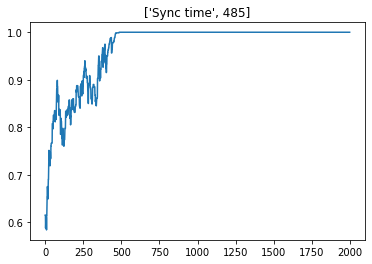

In [8]:

# параметры ДМЧ
K=10
N=20
L=2
Alice = TPM(K=K,N=N,L=L) # Алиса
Bob   = TPM(K=K,N=N,L=L) # Боб

M=2000 # число итераций

score=np.zeros(M) # место для похожести

for i in range(0,M): # итерации синхронизации
    X=rand_x(K,N) # случайный вход

    Ta = Alice.predict(X) # выход Алисы
    Tb =   Bob.predict(X) # выход Боба
 
    Alice.update(Tb) # Обновляем Алису
    Bob.update(Ta)   # Обновляем Боба

    score[i]=sync_score(Alice, Bob) # их похожесть

sync_time=np.where(score==1.0)[0][0] # ищем первую синхронизацию
plt.figure(1) #  
plt.plot(range(0,M),score) # рисуем
plt.title(['Sync time', sync_time]) # заголовок

print(Alice.W) # веса Алисы
print(Bob.W) # веса Боба

Достигнув однажды синхронизации, веса ДМЧ будут одинаковы, значит и выходы обеих ДМЧ и выходы их нейронов будут одинаковы, а значит веса будут изменяться одинаково (т.к. изменяются веса только при совпадении выходов ДМЧ и только у тех нейронов, выход которых совпадает с выходом ДМЧ, а они одинаковы у обеих ДМЧ). 

# Задание 4 (домашнее)
Повторите задание 3 добавив третью ДМЧ - злоумышленника Еву - с теми же параметрами.

Алиса и Боб синхронизируются между собой, Ева пытается синхронизироваться с Алисой (но Алиса, конечно же, не синхронизируется с Евой).

Выведите график изменения похожести весов Алисы и Евы от времени (итераций). Смогла ли Ева за 10000 итераций синхронизироваться с Алисой?
(самостоятельно проверьте для Боба)



[[ 0  0 -2  0 -2  0  2 -2  1  0  2  2 -1  1  2  0  1 -1  2  1]
 [-2 -1 -2  2  2  1  2  0  0  0  1  2 -1  1 -2 -2 -2 -1  2  2]
 [-1  1 -2  2 -1  0 -1  1 -2 -1 -2  2  2 -2 -2 -2  2  2 -2  2]
 [ 1 -2 -1  1 -1  1 -2 -2 -2  0  2 -1 -2 -1  2 -1  2  2 -2  1]
 [-2  0  0  0 -1 -1  2  2 -2  2 -1  1  0  0  0 -2 -1  0  2  2]
 [-2  0  0 -2 -2  0  2 -1 -1 -2 -2  0 -2 -1  2  1  1  0 -2  0]
 [ 0  1  2  2  0  0 -2 -1  2  2 -1  2 -2 -2 -1 -1  1  0  2  2]
 [-2  2  0  0  1  1  0  2  2  0  2  1 -2 -1  1 -2 -2 -2  2 -1]
 [-1  2  2  2  1  0 -2  0 -1 -1 -1 -2  1 -1 -2  1  2 -2  2 -2]
 [-2  2  2  1  2 -1  0  1  2  0  0  2 -1  1 -2  1  2  2 -1  1]]
[[ 0 -2 -2 -1  0  0  2 -2  1  1  2  2 -1 -1  2  1 -1  0  2  2]
 [-2 -2 -1  2  2 -2  2 -2 -2  1  0  0 -2  1 -2  0 -1 -1  2  0]
 [-1  1 -1  0  2 -1  1 -2 -1 -1 -2  2  2  0 -2  0 -1  2 -2  2]
 [ 0  1  2  1  2  2 -2 -2 -1  0 -2 -1  1  0  1 -1  2  2 -2  2]
 [-2 -1  0  0  2 -2  0  1 -2  0  0  2  2  1 -2  0 -2  2  1 -2]
 [ 0  1  0 -2 -2 -1  2 -2 -1 -1  0 -1 -2 -2  2  2 -1 -

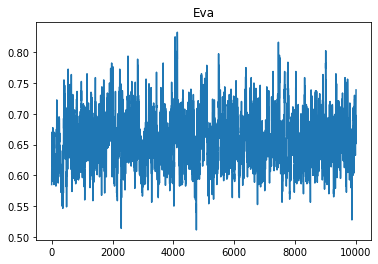

In [9]:

K=10
N=20
L=2
Alice = TPM(K=K,N=N,L=L)
Bob   = TPM(K=K,N=N,L=L)
Eva   = TPM(K=K,N=N,L=L)# ДМЧ Евы
M=10000

score=np.zeros(M)
ax=plt.axes();

for i in range(0,M):
    X=rand_x(K,N)

    Ta = Alice.predict(X)
    Tb =   Bob.predict(X)
    Te =   Eva.predict(X) # Выход ДМЧ Евы

    Alice.update(Tb)
    Bob.update(Ta)
    Eva.update(Ta) # синхронизируем Еву с Алисой
    #Eva.update(Tb) # или с Бобом

    score[i]=sync_score(Alice, Eva)# похожесть Евы и Алисы


plt.figure(1)   
plt.plot(range(0,M),score)
plt.title('Eva')

print(Alice.W)
print(Eva.W)

# Задание 5 (домашнее)
Постройте графики зависимости времени синхронизации Алисы и Боба от

K = [5, 10, 20, 50, 100, 500, 1000, 2000, 5000, 10000] при N=10, L=2

N = [5, 10, 20, 50, 100, 500, 1000, 2000, 5000, 10000] при K=10, L=2

L = [1,2,3,4,5,6,7,8] при K=10, N=10.

Ограничьтесь 10000 итерациями, если синхронизация не наступает за это время, установите время синхронизации в Inf. 

Какой параметр больше всего влияет на время синхронизации? Объясните почему.

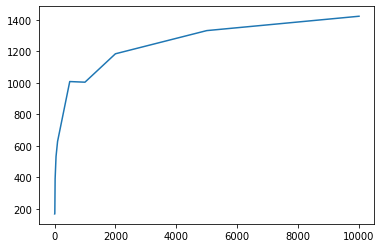

In [10]:
# графики для K
KK=[5, 10, 20, 50, 100, 500, 1000, 2000, 5000, 10000]
N=10
L=2

M=10000 # число итераций
sync_time=[]

for K in KK:
    Alice = TPM(K=K,N=N,L=L) # Алиса
    Bob   = TPM(K=K,N=N,L=L) # Боб
    score=0 #
    sync_time.append(np.inf)
    for i in range(0,M): # итерации синхронизации
        X=rand_x(K,N) # случайный вход
        Ta = Alice.predict(X) # выход Алисы
        Tb =   Bob.predict(X) # выход Боба
        Alice.update(Tb) # Обновляем Алису
        Bob.update(Ta)   # Обновляем Боба
        score=sync_score(Alice, Bob) # их похожесть
        if score==1.0: # если синхронизация достигнута
            sync_time[-1]=i;#  записываем номер итерации
            break #  и выходим
            
            
plt.plot(KK,sync_time)


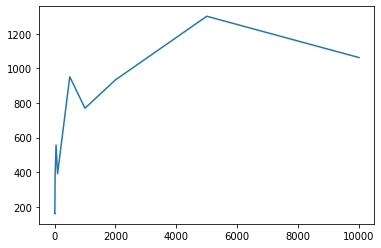

In [11]:
# графики для N
K=10
NN=[5, 10, 20, 50, 100, 500, 1000, 2000, 5000, 10000]
L=2

M=10000 # число итераций
sync_time=[]

for N in NN:
    Alice = TPM(K=K,N=N,L=L) # Алиса
    Bob   = TPM(K=K,N=N,L=L) # Боб
    score=0 #
    sync_time.append(np.inf)
    for i in range(0,M): # итерации синхронизации
        X=rand_x(K,N) # случайный вход
        Ta = Alice.predict(X) # выход Алисы
        Tb =   Bob.predict(X) # выход Боба
        Alice.update(Tb) # Обновляем Алису
        Bob.update(Ta)   # Обновляем Боба
        score=sync_score(Alice, Bob) # их похожесть
        if score==1.0:
            sync_time[-1]=i;
            break
            
            
plt.plot(NN,sync_time)


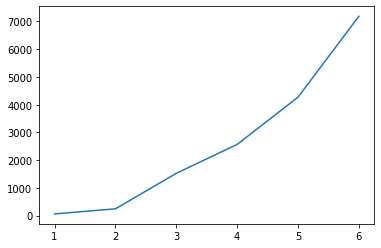

In [12]:
# графики для L
K=10
N=10
LL=[1,2,3,4,5,6,7,8]

M=10000 # число итераций
sync_time=[]

for L in LL:
    Alice = TPM(K=K,N=N,L=L) # Алиса
    Bob   = TPM(K=K,N=N,L=L) # Боб
    score=0 #
    sync_time.append(np.inf)
    for i in range(0,M): # итерации синхронизации
        X=rand_x(K,N) # случайный вход
        Ta = Alice.predict(X) # выход Алисы
        Tb =   Bob.predict(X) # выход Боба
        Alice.update(Tb) # Обновляем Алису
        Bob.update(Ta)   # Обновляем Боба
        score=sync_score(Alice, Bob) # их похожесть
        if score==1.0:
            sync_time[-1]=i;
            break
            
            
plt.plot(LL,sync_time)


Мы видим, что больше всего на время синхронизации влияет параметр L - диапазон весов. При большем диапазоне веса могут принимать большее число разных значений и тем труднее заставить их быть одинаковыми. Значит выгодно иметь маленькое L. При этом параметры K и N влияют не очень сильно, значит можем генерировать очень длинные ключи, тысячи и десятки тысяч битов. 

# Дополнительное задание
Напишите функцию, которая по параметрам K,N,L оценивает (примерно) длину секретного ключа в битах. Посчитайте длину секретного ключа в битах для случая K=128,N=128,L=2.


In [13]:
def key_len(K,N,L):
    return K*N*np.trunc(np.log2(2*L))


In [14]:
key_len(128,128,2)

32768.0

Каждый вес даст 2 * L + 1 возможных значений, для кодировки которых нужно   log2(2*L+1) бит (в меньшую сторону), а таких весов K * N штук.

Обратите также внимание, что после наступления синхронизации, ДМЧ могут продолжить работу, и будут генерировать все новые и новые веса (ключи), одинаковые у абонентов.

Таким образом нет проблем в генерации множества очень длинных ключей, которые затем можно использовать для шифрования. 

# Ссылки

Ссылки на литературу:

Klimov, A., Mityagin, A., & Shamir, A. (2002, December). Analysis of neural cryptography. In International Conference on the Theory and Application of Cryptology and Information Security (pp. 288-298). Springer, Berlin, Heidelberg.

Использованы и адаптированы материалы:

https://github.com/jematos92/neuralkeyMatlab 

https://github.com/farizrahman4u/neuralkey 



